In [297]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = pd.read_csv(r"../data/df_X.csv", engine="pyarrow")
y= pd.read_csv(r"../data/df_y.csv", engine="pyarrow")

# Código do Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred)   
rec = recall_score(y_test, y_pred)      

print(f"Acurácia : {acc:.2f}")
print(f"Precisão : {prec:.2f}")
print(f"Recall   : {rec:.2f}")

Acurácia : 0.70
Precisão : 0.50
Recall   : 0.53


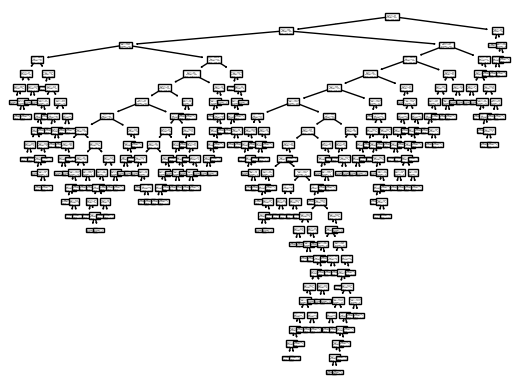

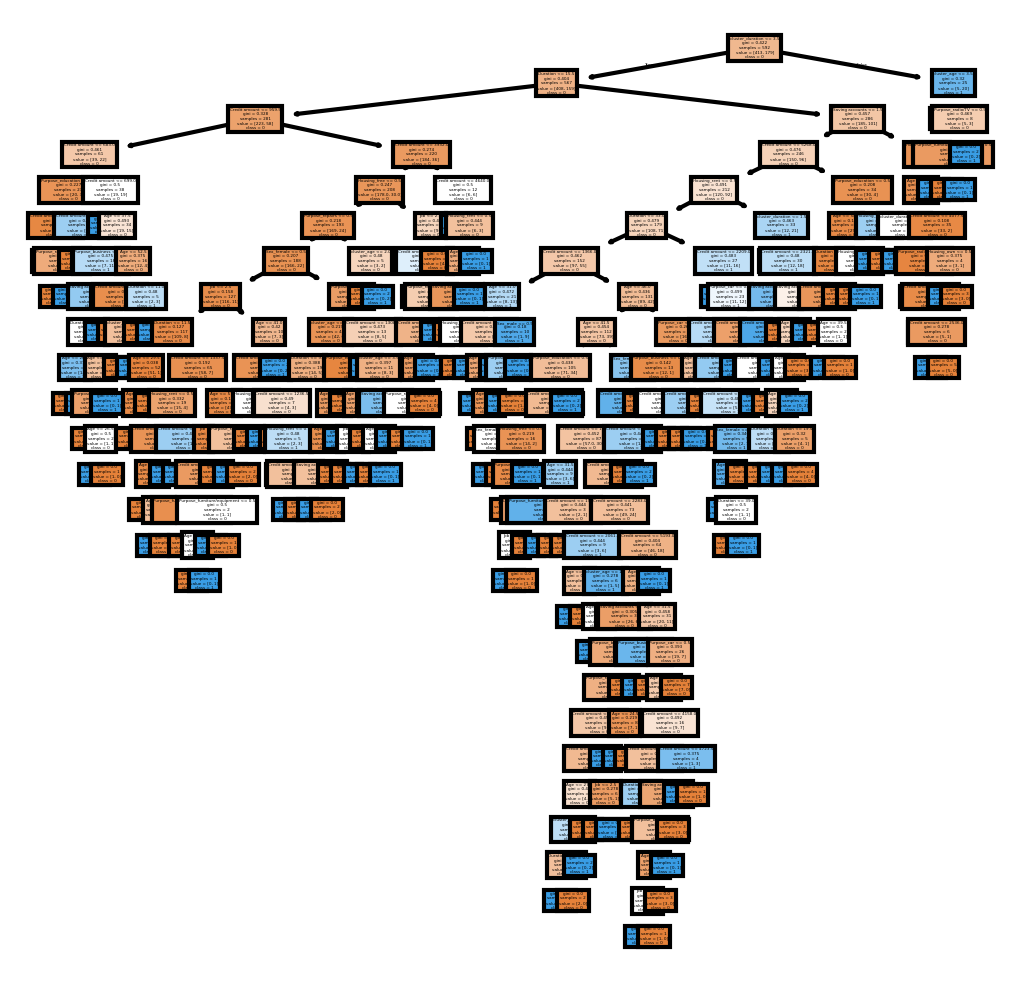

In [299]:
tree.plot_tree(model);
fn = X.columns.tolist()
cn = model.classes_.astype(str).tolist()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(model, 
               feature_names=fn, 
               class_names=cn, 
               filled=True)
fig.savefig('../data/imagens/imagename.png')